## Equations


\begin{equation}
\frac{dS}{dt} =
-\beta C S \frac{I}{N} -\rho  
\end{equation}

\begin{equation}
\frac{dE}{dt} =
\beta C S \frac{I}{N} 
+\delta - \frac{1}{L} E
\end{equation}

\begin{equation}
\frac{dI}{dt} =
\frac{1}{L} E
-\alpha I
\end{equation}

\begin{equation}
\frac{dR}{dt} =
\alpha I 
\end{equation}

\begin{equation}
\frac{dV}{dt} =
\rho 
\end{equation}


- $\beta_1$ = Variant 1 Infection rate ,
- $\beta_2$ = Variant 2 Infection rate ,
- $\alpha$ = Recovery rate,
- $\rho$ = Vaccination rate
- $p$ = proportion of imports that are infectious (for now assume the have the 2nd variant)
- $\delta$ = Import rate


In [1]:
import PyDSTool as dst
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# setting up initial conditions, parameters and variables
icdict = {'s': 4900000, 'l': 0, 'i': 0, 'r':0}
pardict = {'beta': 0.3332, 'c': 1, 'delta': 100/7, 'L': 4.7, 'alpha': 10, 'N': 4900000, 'rho': 0}

# defining RHS of differential equations of the system
ds_rhs = '- (beta * c * s * (i/N)) - rho'

dl_rhs = '(beta * c * s * (i/N)) + (delta) - ((1/L) * l)'

di_rhs = '((1/L) * l) - ((1/alpha) * i)'

dr_rhs = '((1/alpha) * i) + rho'

vardict = {'s': ds_rhs, 'l': dl_rhs, 'i': di_rhs, 'r': dr_rhs} # tells DSTool that there are 5 dynamic state var's, specified by the eqns in the strings dS/dI/dR_rhs

DSargs = dst.args()
DSargs.name = 'SEIR' # name the model
DSargs.ics = icdict # set initial condn's
DSargs.pars = pardict # set parameters
DSargs.tdata = [0, 20] # how long we expect to integrate for
DSargs.varspecs = vardict

#Generator
SEIR = dst.Generator.Vode_ODEsystem(DSargs)

# 1st Wave

**28 Feb to 10th March, when first measures were introduced**

Choices for parameters during this period:

- $\beta = 0.3332$ , 
- $\delta = 100/7$ , Assuming we were importing an avg of 100 cases/week since total confirmed international cases for the month of March 2020 was 294 with 1396 cases of unknown origin (presuming some imported

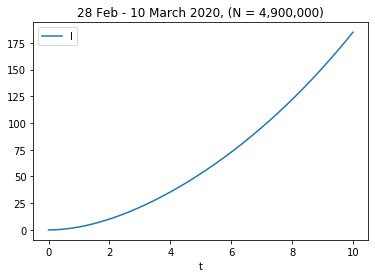

In [3]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR.set(pars={'c': 1, 'delta': 200/7, 'N': 4900000, 'rho': 0},
        ics={'i': 0, 's': 4900000, 'r': 0},
        tdata=[0,10]) # t is in days starting on Match 1st 2020

# computing points for plotting 
traj1_SEIR = SEIR.compute('test')
pts1_SEIR = traj1_SEIR.sample()

# creating plot
plt.plot(pts1_SEIR['t'], pts1_SEIR['i'], label='I')
#plt.plot(pts1_SEIR['t'], pts1_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('28 Feb - 10 March 2020, (N = 4,900,000)')
plt.show()

In [4]:
pts1_SEIR['s'][1:-1:100]

array([4899999.99999966, 4899999.67626051, 4899997.61107767,
       4899992.43248414, 4899983.00386894, 4899968.31200349,
       4899947.39045999, 4899919.2656268 , 4899882.91693409,
       4899837.2457674 ])

**10th to 27th March, when full lockdown measures were implemented**

Choices for parameters during this period:

- $\beta = 0.25$  
- $\delta = 50/7$ , Assuming we were importing an avg of 50 cases/week since total confirmed international cases for the month of March 2020 was 294 but protective measures now in place

In [5]:
# getting final values for I, S and R compartments from first period
s_2 = pts1_SEIR['s'][-1]
l_2 = pts1_SEIR['l'][-1]
i_2 = pts1_SEIR['i'][-1]
r_2 = pts1_SEIR['r'][-1]

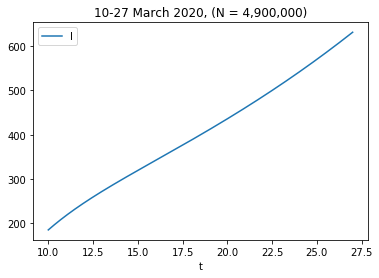

In [6]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR.set(pars={'c': 0.5, 'delta': 75/7, 'N': 4900000, 'rho': 0},
        ics={'i': i_2, 's': s_2, 'r': r_2, 'l': l_2},
        tdata=[10,27]) # t is in days starting on Match 1st 2020

# computing points for plotting 
traj2_SEIR = SEIR.compute('test')
pts2_SEIR = traj2_SEIR.sample()

# creating plot
plt.plot(pts2_SEIR['t'], pts2_SEIR['i'], label='I')
#plt.plot(pts_SEIR['t'], pts_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('10-27 March 2020, (N = 4,900,000)')
plt.show()

In [7]:
pts2_SEIR['s'][1:-1:100]

array([4899781.97641149, 4899748.31204896, 4899709.57636118,
       4899666.33286379, 4899618.9387141 , 4899567.60452333,
       4899512.43630967, 4899453.46490354, 4899390.66653503,
       4899323.97722309, 4899253.30280965, 4899178.52592965,
       4899099.51082601, 4899016.10664752, 4898928.14967765,
       4898835.4648082 , 4898737.8664804 ])

**27th March to June 1st, first full lockdown period, Level 5**

In [8]:
# getting final values for S,E,I and R compartments from second period
s_3 = pts2_SEIR['s'][-1]
l_3 = pts2_SEIR['l'][-1]
i_3 = pts2_SEIR['i'][-1]
r_3 = pts2_SEIR['r'][-1]

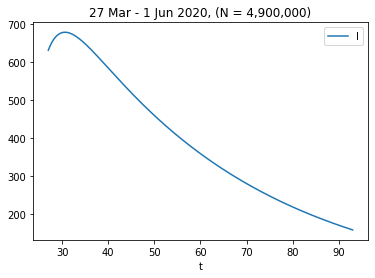

In [9]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR.set(pars={'c':0.2, 'delta': 0/7, 'N': 4900000, 'rho': 0},
        ics={'i': i_3, 's': s_3, 'r': r_3, 'l': l_3},
        tdata=[27,93]) # t is in days starting on Match 1st 2020

# computing points for plotting 
traj3_SEIR = SEIR.compute('test')
pts3_SEIR = traj3_SEIR.sample()

# creating plot
plt.plot(pts3_SEIR['t'], pts3_SEIR['i'], label='I')
#plt.plot(pts_SEIR['t'], pts_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('27 Mar - 1 Jun 2020, (N = 4,900,000)')
plt.show()

In [10]:
pts3_SEIR['s'][1:-1:100]

array([4898636.84395384, 4898593.84440046, 4898549.54453032,
       4898504.56384152, 4898459.35957335, 4898414.26750449,
       4898369.53253256, 4898325.33159353, 4898281.7908388 ,
       4898238.99850771, 4898197.01457361, 4898155.87797091,
       4898115.61200906, 4898076.22842768, 4898037.73043251,
       4898000.11496837, 4897963.37441945, 4897927.49788061,
       4897892.47210765, 4897858.28222599, 4897824.91225947,
       4897792.34552344, 4897760.56491684, 4897729.55313831,
       4897699.29284523, 4897669.76677076, 4897640.95780854,
       4897612.8490739 , 4897585.42394724, 4897558.66610408,
       4897532.55953535, 4897507.08856024, 4897482.23783358,
       4897457.99234924, 4897434.33744053, 4897411.25877852,
       4897388.74236848, 4897366.77454563, 4897345.34196967,
       4897324.43161906, 4897304.03078472, 4897284.1270636 ,
       4897264.70835214, 4897245.76283954, 4897227.27900122,
       4897209.24559216, 4897191.65164036, 4897174.4864405 ,
       4897157.73954743,

In [11]:
daily_cases = np.concatenate((pts1_SEIR['i'][1:-1:100], pts2_SEIR['i'][1:-1:100], pts3_SEIR['i'][1:-1:100]))
days_elapsed = np.concatenate((pts1_SEIR['t'][1:-1:100],pts2_SEIR['t'][1:-1:100] ,pts3_SEIR['t'][1:-1:100]))

In [12]:
np.sum(daily_cases)

33267.866662260174

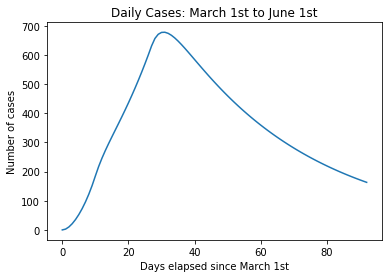

In [13]:
plt.plot(days_elapsed, daily_cases)
plt.title('Daily Cases: March 1st to June 1st')
plt.xlabel('Days elapsed since March 1st')
plt.ylabel('Number of cases')
plt.show()

# 2nd Wave

**1st June to 31st July, Level 4**

In [14]:
# getting final values for S,E,I and R compartments from 1st Wave
s_4 = pts3_SEIR['s'][-1]
l_4 = pts3_SEIR['l'][-1]
i_4 = pts3_SEIR['i'][-1]
r_4 = pts3_SEIR['r'][-1]

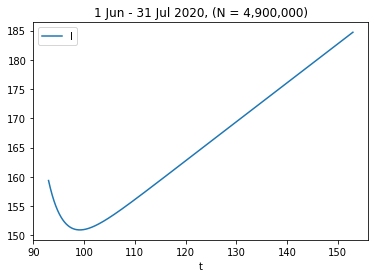

In [15]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR.set(pars={'c': 0.3, 'delta': 7/7, 'N': 4900000, 'rho': 0},
        ics={'i': i_4, 's': s_4, 'r': r_4, 'l': l_4},
        tdata=[93,153]) # t is in days starting on Match 1st 2020

# computing points for plotting 
traj4_SEIR = SEIR.compute('test')
pts4_SEIR = traj4_SEIR.sample()

# creating plot
plt.plot(pts4_SEIR['t'], pts4_SEIR['i'], label='I')
#plt.plot(pts_SEIR['t'], pts_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('1 Jun - 31 Jul 2020, (N = 4,900,000)')
plt.show()

In [16]:
pts4_SEIR['s'][1:-1:100]

array([4896917.37493443, 4896901.63016327, 4896886.15647619,
       4896870.86309859, 4896855.68363736, 4896840.56953278,
       4896825.48526895, 4896810.40487072, 4896795.30934126,
       4896780.184788  , 4896765.02105177, 4896749.81070411,
       4896734.54831389, 4896719.22991096, 4896703.85259379,
       4896688.41424243, 4896672.91330864, 4896657.34866237,
       4896641.71947943, 4896626.02515946, 4896610.26526567,
       4896594.43948101, 4896578.54757606, 4896562.58938543,
       4896546.56479063, 4896530.47370746, 4896514.3160768 ,
       4896498.09185796, 4896481.80102365, 4896465.44355644,
       4896449.01944616, 4896432.52868783, 4896415.97128048,
       4896399.34722591, 4896382.65652805, 4896365.89919238,
       4896349.07522549, 4896332.18463487, 4896315.22742864,
       4896298.20361535, 4896281.11320396, 4896263.95620376,
       4896246.73262408, 4896229.44247455, 4896212.08576497,
       4896194.66250525, 4896177.17270532, 4896159.61637515,
       4896141.9935249 ,

**1st Aug to Oct 4th, when countrywide level 3 restrictions were introduced**

In [17]:
# getting final values for S,E,I and R compartments from 1st Period of Wave 2
s_5 = pts4_SEIR['s'][-1]
l_5 = pts4_SEIR['l'][-1]
i_5 = pts4_SEIR['i'][-1]
r_5 = pts4_SEIR['r'][-1]

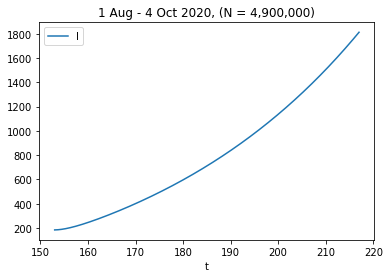

In [18]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR.set(pars={'c': 0.4, 'delta': 100/7, 'N': 4900000, 'rho': 0},
        ics={'i': i_5, 's': s_5, 'r': r_5, 'l': l_5},
        tdata=[153,217]) # t is in days starting on Match 1st 2020

# computing points for plotting 
traj5_SEIR = SEIR.compute('test')
pts5_SEIR = traj5_SEIR.sample()

# creating plot
plt.plot(pts5_SEIR['t'], pts5_SEIR['i'], label='I')
#plt.plot(pts_SEIR['t'], pts_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('1 Aug - 4 Oct 2020, (N = 4,900,000)')
plt.show()

In [19]:
pts5_SEIR['s'][1:-1:100]

array([4895925.45755424, 4895900.72219271, 4895875.4306305 ,
       4895849.23097331, 4895821.86035526, 4895793.11943093,
       4895762.85410482, 4895730.94244314, 4895697.2852966 ,
       4895661.79958041, 4895624.41345692, 4895585.06288076,
       4895543.68911915, 4895500.2369708 , 4895454.65348508,
       4895406.88703844, 4895356.8866677 , 4895304.6015863 ,
       4895249.98083181, 4895192.9730073 , 4895133.52608982,
       4895071.58728622, 4895007.10292404, 4894940.01836598,
       4894870.2779419 , 4894797.82489336, 4894722.60132624,
       4894644.54816993, 4894563.60514008, 4894479.71070488,
       4894392.80205269, 4894302.81506155, 4894209.68426857,
       4894113.34283988, 4894013.72254153, 4893910.75370878,
       4893804.36521632, 4893694.48444862, 4893581.03726768,
       4893463.94798288, 4893343.1393187 , 4893218.53238215,
       4893090.04663028, 4892957.59983692, 4892821.10805808,
       4892680.4855973 , 4892535.64497024, 4892386.4968689 ,
       4892232.95012539,

**4th Oct to 21 Oct, Level 3**

In [20]:
# getting final values for S,E,I and R compartments from 2nd Period of Wave 2
s_6 = pts5_SEIR['s'][-1]
l_6 = pts5_SEIR['l'][-1]
i_6 = pts5_SEIR['i'][-1]
r_6 = pts5_SEIR['r'][-1]

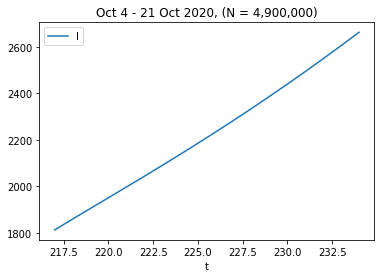

In [21]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR.set(pars={'c':0.4, 'delta': 25/7, 'N': 4900000, 'rho': 0},
        ics={'i': i_6, 's': s_6, 'r': r_6, 'l': l_6},
        tdata=[217,234]) # t is in days starting on Match 1st 2020

# computing points for plotting 
traj6_SEIR = SEIR.compute('test')
pts6_SEIR = traj6_SEIR.sample()

# creating plot
plt.plot(pts6_SEIR['t'], pts6_SEIR['i'], label='I')
#plt.plot(pts_SEIR['t'], pts_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('Oct 4 - 21 Oct 2020, (N = 4,900,000)')
plt.show()

In [22]:
pts6_SEIR['s'][1:-1:100]

array([4889098.18701136, 4888853.92492487, 4888603.51239748,
       4888347.00831468, 4888084.4194934 , 4887815.71474806,
       4887540.83494731, 4887259.70020336, 4886972.21500211,
       4886678.27186431, 4886377.75395072, 4886070.5369133 ,
       4885756.49020579, 4885435.47800384, 4885107.35985374,
       4884771.99111602, 4884429.22326806])

**21 Oct to 4 Dec, Lockdown 2, Level 5**

In [23]:
# getting final values for S,E,I and R compartments from 3rd Period of Wave 2
s_7 = pts6_SEIR['s'][-1]
l_7 = pts6_SEIR['l'][-1]
i_7 = pts6_SEIR['i'][-1]
r_7 = pts6_SEIR['r'][-1]

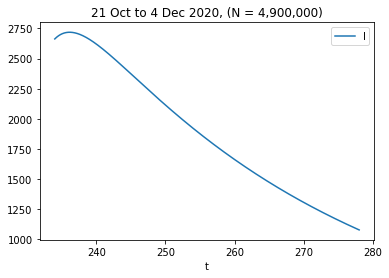

In [24]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR.set(pars={'c': 0.2, 'delta': 10/7, 'N': 4900000, 'rho': 0},
        ics={'i': i_7, 's': s_7, 'r': r_7, 'l': l_7},
        tdata=[234,278]) # t is in days starting on Match 1st 2020

# computing points for plotting 
traj7_SEIR = SEIR.compute('test')
pts7_SEIR = traj7_SEIR.sample()

# creating plot
plt.plot(pts7_SEIR['t'], pts7_SEIR['i'], label='I')
#plt.plot(pts_SEIR['t'], pts_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('21 Oct to 4 Dec 2020, (N = 4,900,000)')
plt.show()

In [25]:
pts7_SEIR['s'][1:-1:100]

array([4884084.2159781 , 4883905.70834496, 4883725.43338113,
       4883544.95623343, 4883365.42280046, 4883187.66533791,
       4883012.28161607, 4882839.69424906, 4882670.1951592 ,
       4882503.97889592, 4882341.16760209, 4882181.82971495,
       4882025.99397404, 4881873.6599085 , 4881724.80568552,
       4881579.39398303, 4881437.37637674, 4881298.69662063,
       4881163.29309116, 4881031.10060896, 4880902.05179337,
       4880776.07806588, 4880653.11039201, 4880533.07982675,
       4880415.91791256, 4880301.55696791, 4880189.93029324,
       4880080.97231606, 4879974.6186901 , 4879870.80635992,
       4879769.47360094, 4879670.56004027, 4879574.00666337,
       4879479.75581144, 4879387.75117055, 4879297.93775549,
       4879210.26189043, 4879124.67118616, 4879041.11451566,
       4878959.54198904, 4878879.90492696, 4878802.15583408,
       4878726.24837268, 4878652.13733574])

## Summary Trajectory

In [26]:
daily_cases2 = np.concatenate((pts4_SEIR['i'][1:-1:100], pts5_SEIR['i'][1:-1:100], pts6_SEIR['i'][1:-1:100], pts7_SEIR['i'][1:-1:100] ))
days_elapsed2 = np.concatenate((pts4_SEIR['t'][1:-1:100],pts5_SEIR['t'][1:-1:100] ,pts6_SEIR['t'][1:-1:100], pts7_SEIR['t'][1:-1:100]))

In [27]:
np.sum(daily_cases2)

181419.67442534078

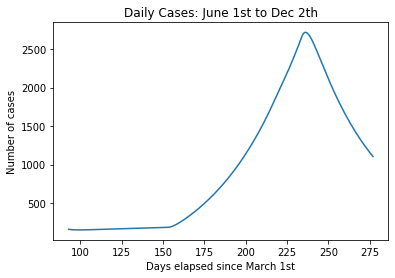

In [28]:
plt.plot(days_elapsed2, daily_cases2)
plt.title('Daily Cases: June 1st to Dec 2th')
plt.xlabel('Days elapsed since March 1st')
plt.ylabel('Number of cases')
plt.show()

In [29]:
test = np.concatenate((daily_cases, pts4_SEIR['i'][1:-1:100], pts5_SEIR['i'][1:-1:100], pts6_SEIR['i'][1:-1:100]))

In [30]:
print('cumulative cases as of Dec4th 2020 = ' + str(np.sum(test)))

cumulative cases as of Dec4th 2020 = 131004.6673959869


# 3rd Wave

**4th Dec to 22 Dec, Level 3 but with lots of imports and more house mixing**

In [31]:
# getting final values for S,E,I and R compartments from 3rd Period of Wave 2
s_8 = pts7_SEIR['s'][-1]
l_8 = pts7_SEIR['l'][-1]
i_8 = pts7_SEIR['i'][-1]
r_8 = pts7_SEIR['r'][-1]

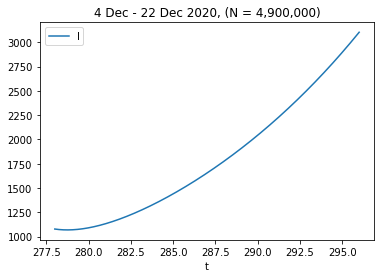

In [32]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR.set(pars={'c': 0.65, 'delta': 150/7, 'N': 4900000, 'rho': 0},
        ics={'i': i_8, 's': s_8, 'r': r_8, 'l': l_8},
        tdata=[278,296]) # t is in days starting on Match 1st 2020

# computing points for plotting 
traj8_SEIR = SEIR.compute('test')
pts8_SEIR = traj8_SEIR.sample()

# creating plot
plt.plot(pts8_SEIR['t'], pts8_SEIR['i'], label='I')
#plt.plot(pts_SEIR['t'], pts_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('4 Dec - 22 Dec 2020, (N = 4,900,000)')
plt.show()

**22 Dec to ??, Level 5**

In [33]:
# getting final values for S,E,I and R compartments from 1st Period of Wave 3
s_9 = pts8_SEIR['s'][-1]
l_9 = pts8_SEIR['l'][-1]
i_9 = pts8_SEIR['i'][-1]
r_9 = pts8_SEIR['r'][-1]

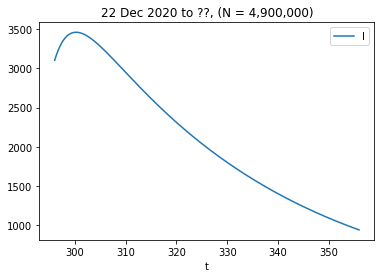

In [34]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR.set(pars={'c': 0.2, 'delta': 0, 'N': 4900000, 'rho': 0},
        ics={'i': i_9, 's': s_9, 'r': r_9, 'l': l_9},
        tdata=[296,356]) # t is in days starting on Match 1st 2020

# computing points for plotting 
traj9_SEIR = SEIR.compute('test')
pts9_SEIR = traj9_SEIR.sample()

# creating plot
plt.plot(pts9_SEIR['t'], pts9_SEIR['i'], label='I')
#plt.plot(pts_SEIR['t'], pts_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('22 Dec 2020 to ??, (N = 4,900,000)')
plt.show()

## Wave 3 Summary Trajectory

In [35]:
daily_cases3 = np.concatenate((pts8_SEIR['i'][1:-1:100], pts9_SEIR['i'][1:-1:100] ))
days_elapsed3 = np.concatenate((pts8_SEIR['t'][1:-1:100], pts9_SEIR['t'][1:-1:100]))

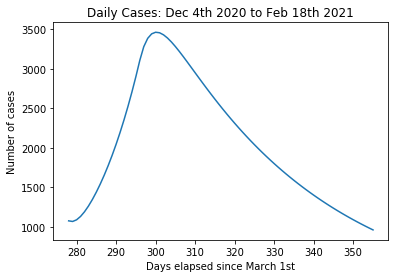

In [36]:
plt.plot(days_elapsed3, daily_cases3)
plt.title('Daily Cases: Dec 4th 2020 to Feb 18th 2021')
plt.xlabel('Days elapsed since March 1st')
plt.ylabel('Number of cases')
plt.show()

In [37]:
ys = np.concatenate((daily_cases, daily_cases2, daily_cases3))
xs = np.concatenate((days_elapsed, days_elapsed2, days_elapsed3))

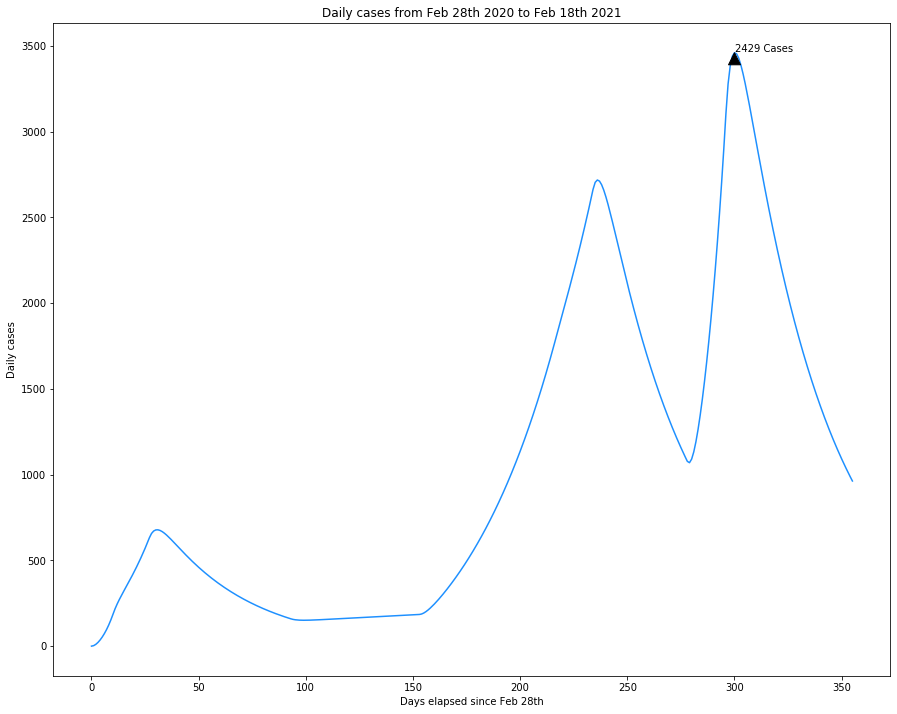

In [38]:
fig = plt.figure(figsize = (15,15), edgecolor = 'r')

ax = fig.add_subplot(111)
ax.plot(xs, ys, 'dodgerblue')
ax.set_aspect(aspect=0.08)

ymax = max(ys)
xpos = np.where(ys == ymax)
xmax = xs[xpos]

ax.annotate('2429 Cases', xy=(xmax, ymax), xytext=(xmax, ymax+5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.title('Daily cases from Feb 28th 2020 to Feb 18th 2021')
plt.xlabel('Days elapsed since Feb 28th')
plt.ylabel('Daily cases')
plt.show()
plt.close()

In [39]:
sorted = np.sort(ys)
ymaxs = sorted[-4:-1]

maxposns = np.empty(3)

for y in ymaxs:
    np.append(maxposns, np.where(ys == y))

In [40]:
maxposn1 = np.where(ys == ymaxs[0])
maxposn2 = np.where(ys == ymaxs[1])
maxposn3 = np.where(ys == ymaxs[2])

# Wave 3  with 2nd Variant

## Equations:

\begin{equation}
\frac{dS}{dt} =
+\mu N
-\left(\mu + \rho +  \beta_1 C \frac{I_1}{N} + \beta_2 C  \frac{I_2}{N} \right) S
\end{equation}

\begin{equation}
\frac{dV}{dt} =
\rho S - \left( \mu + \beta_2 C \frac{I_2}{N} \right) V
\end{equation}


\begin{equation}
\frac{dE_1}{dt} =
\beta_1 C \frac{I_1}{N} S
+\delta_1 - \left( \mu + \frac{1}{L} \right) E_1
\end{equation}

\begin{equation}
\frac{dE_2}{dt} =
\beta_2 C \frac{I_2}{N} S +\delta_2 
+\beta_2 C \frac{I_2}{N} V - \left(\mu + \frac{1}{L} \right) E_2
\end{equation}

\begin{equation}
\frac{dI_1}{dt} =
\frac{1}{L} E_1 
-\left( \mu + \frac{1}{\alpha} \right) I_1
\end{equation}

\begin{equation}
\frac{dI_2}{dt} =
\frac{1}{L} E_2 + 
-\left( \mu + \frac{1}{\alpha} \right) I_2
\end{equation}

\begin{equation}
\frac{dR}{dt} =
\frac{1}{\alpha} \left( I_1 + I_2 \right)
-\mu R
\end{equation}



- $\beta_1$ = Variant 1 Infection rate 
- $\beta_2$ = Variant 2 Infection rate 
- $C$ = Contact rate
- $\alpha$ = Recovery period (days)
- $\rho$ = Vaccination rate (fraction of S population)
- $\mu$ = Natural Birth\Death Rate (Assumed equal to keep N constant)
- $\delta_1$ = Import rate of people exposed to variant 1
- $\delta_2$ = Import rate of people exposed to variant 2


In [41]:
# setting up initial conditions, parameters and variables
icdict = {'s': 1, 'l1':0, 'l2':0, 'i1': 1, 'i2':1, 'r':0, 'v': 0}
pardict = {'L': 4.7, 'beta1': 0.3332, 'beta2': 0.5644, 'c': 1, 'delta1': 0, 'delta2': 0, 'alpha': 10, 'N': 4900000, 'rho': 0, 'mu': 0.003}

# defining RHS of differential equations of the system
ds_rhs = 'mu * N - (beta1 * c * s * (i1/N)) - (beta2 * c * s * (i2/N)) - rho * s - mu * s'
dl1_rhs = '(beta1 * c * s * (i1/N)) + (delta1) - ((1/L) * l1) - mu * l1'
dl2_rhs = '(beta2 * c * s * (i2/N)) + (delta2) + (beta2 * c * v * (i2/N)) - ((1/L) * l2) - mu * l2'
di1_rhs = '((1/L) * l1) - (1/alpha * i1) - mu * i1'
di2_rhs = '((1/L) * l2) - (1/alpha * i2) - mu * i2'
dr_rhs = '1/alpha * (i1 +i2) - mu * r'
dv_rhs = 'rho * s - mu * v - (beta2 * c * v * (i2/N))'

vardict = {'s': ds_rhs, 'l1': dl1_rhs, 'l2': dl2_rhs, 'i1': di1_rhs, 'i2': di2_rhs, 'r': dr_rhs, 'v': dv_rhs} # tells DSTool that there are 5 dynamic state var's, specified by the eqns in the strings dS/dI/dR_rhs

DSargs = dst.args()
DSargs.name = 'SEIR3' # name the model
DSargs.ics = icdict # set initial condn's
DSargs.pars = pardict # set parameters
DSargs.tdata = [0, 20] # how long we expect to integrate for
DSargs.varspecs = vardict

#Generator
SEIR3 = dst.Generator.Vode_ODEsystem(DSargs)

In [42]:
# data extracted from SEIR model on 4th Dec 2020

# assume all infections to this point are from variant 1

s_8 = pts7_SEIR['s'][-1]                   # pts7_SEIR['s'][-1] = 4,878,581 for some reason, not updating correctly, 
l1_8 = pts7_SEIR['l'][-1]         # using N - cumulative cases as of Dec 4th for now
i1_8 = pts7_SEIR['i'][-1]
r_8 = pts7_SEIR['r'][-1]

In [43]:
s_8

4878581.208902268

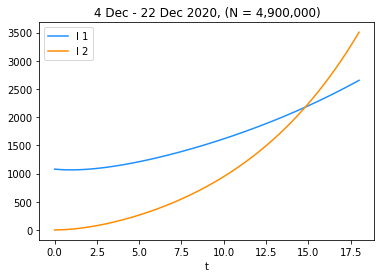

In [44]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR3.set(pars={'c': 0.65 , 'delta1': 10/7, 'delta2': 1000/7, 'N': 4900000, 'rho': 0},
        ics={'i1': i1_8, 'l1': l1_8, 's': s_8, 'r': r_8, 'l2': 0, 'i2': 0},
        tdata=[0,18]) # t is in days starting on Match 1st 2020 278,297

# computing points for plotting 
traj1_SEIR3 = SEIR3.compute('test')
pts1_SEIR3 = traj1_SEIR3.sample()

# creating plot
plt.plot(pts1_SEIR3['t'], pts1_SEIR3['i1'], label='I 1', color='dodgerblue')
plt.plot(pts1_SEIR3['t'], pts1_SEIR3['i2'], label='I 2', color='darkorange')
#plt.plot(pts_SEIR['t'], pts_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('4 Dec - 22 Dec 2020, (N = 4,900,000)')
plt.show()

In [45]:
# data extracted from SEIR model on 22nd Dec 2020

# Variant 2 has become the dominant cause of infection at this point

s_9 = pts1_SEIR3['s'][-1]
l1_9 = pts1_SEIR3['l1'][-1]
i1_9 = pts1_SEIR3['i1'][-1]
l2_9 = pts1_SEIR3['l2'][-1]
i2_9 = pts1_SEIR3['i2'][-1]
r_9 = pts1_SEIR3['r'][-1]

In [46]:
r_9

25167.235270242985

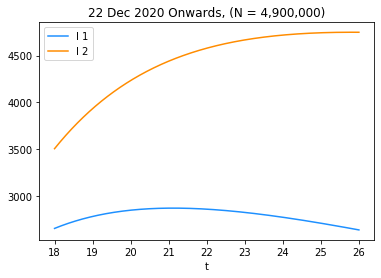

In [47]:
# adjusting parameters and initial conditions, can be done independently without solving ODE's again using generator
SEIR3.set(pars={'c': 0.16 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 0 },
        ics={'i1': i1_9, 'l1': l1_9, 's': s_9, 'r': r_9, 'l2': l2_9, 'i2': i2_9},
        tdata=[18,26]) # t is in days starting on Match 1st 2020

# computing points for plotting 
traj2_SEIR3 = SEIR3.compute('test')
pts2_SEIR3 = traj2_SEIR3.sample()

# creating plot
plt.plot(pts2_SEIR3['t'], pts2_SEIR3['i1'], label='I 1', color='dodgerblue')
plt.plot(pts2_SEIR3['t'], pts2_SEIR3['i2'], label='I 2', color='darkorange')
#plt.plot(pts_SEIR['t'], pts_SEIR['s'], label='S')
#plt.plot(pts_SEIR['t'], pts_SEIR['r'], label='R')
#plt.plot(pts_SIRV['t'], pts_SIRV['l'], label='V')
plt.legend()
plt.xlabel('t')
plt.title('22 Dec 2020 Onwards, (N = 4,900,000)')
plt.show()

# Summary of Christmas Crossover

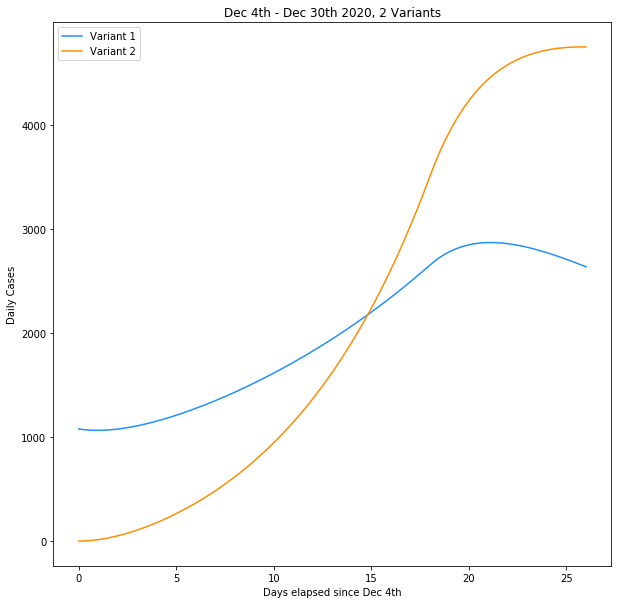

In [48]:
pts_i1 = np.concatenate((pts1_SEIR3['i1'], pts2_SEIR3['i1']))
pts_i2 = np.concatenate((pts1_SEIR3['i2'], pts2_SEIR3['i2']))
pts_t = np.concatenate((pts1_SEIR3['t'], pts2_SEIR3['t']))


plt.figure(figsize=(10,10))
plt.title('Dec 4th - Dec 30th 2020, 2 Variants')
plt.plot(pts_t, pts_i1, label='Variant 1', color='dodgerblue')
plt.plot(pts_t, pts_i2, label='Variant 2', color='darkorange')

plt.legend(loc='upper left')
plt.xlabel('Days elapsed since Dec 4th')
plt.ylabel('Daily Cases')

plt.savefig('Dec 4th - Dec 30th 2020, 2 Variants')

## Plots for various values of $\beta_2$ from Dec 22nd

# Plots for Various values of Delta 2

# Putting it all together

In [50]:
# getting variant 1 data

i1_wave1 = daily_cases
i1_wave2 = daily_cases2
i1_wave3 = pts_i1[1:-1:100]
i1_postdec = 0

# getting variant 2 data

i2_wave1and2 = np.zeros(278)
i2_wave3 = pts_i2[1:-1:100]
i2_postdec = 

SyntaxError: invalid syntax (<ipython-input-50-3dcd821cda75>, line 12)

In [51]:
len(i2_wave3)

NameError: name 'i2_wave3' is not defined

In [52]:
# initial conditions on Dedc 22nd, sourced from model 

s_1 = pts2_SEIR3['s'][-1]
l1_1 = pts2_SEIR3['l1'][-1]
i1_1 = pts2_SEIR3['i1'][-1]
l2_1 = pts2_SEIR3['l2'][-1]
i2_1 = pts2_SEIR3['i2'][-1]
r_1 = pts2_SEIR3['r'][-1]
v_1 = pts2_SEIR3['v'][-1]

In [53]:
# setting up initial conditions, parameters and variables
icdict = {'s': 1, 'l1':0, 'l2':0, 'i1': 1, 'i2':1, 'r':0, 'v': 0}
pardict = {'p':1, 'L': 4.7, 'beta1': 0.3332, 'beta2': 0.5644, 'c': 1, 'delta1': 0, 'delta2': 0, 'alpha': 10, 'N': 4900000, 'rho': 0, 'mu': 0}

# defining RHS of differential equations of the system
ds_rhs = 'mu * s - (beta1 * c * s * (i1/N)) - (beta2 * c * s * (i2/N)) - rho - mu * s'
dl1_rhs = '(beta1 * c * s * (i1/N)) + (1 - p)*(beta1 * c * v * (i1/N)) + (delta1) - ((1/L) * l1) - mu * l1'
dl2_rhs = '(beta2 * c * s * (i2/N)) + (1 - p)*(beta2 * c * v * (i2/N)) + (delta2) - ((1/L) * l2) - mu * l2'
di1_rhs = '((1/L) * l1) - (1/alpha * i1) - mu * i1'
di2_rhs = '((1/L) * l2) - (1/alpha * i2) - mu * i2'
dr_rhs = '(1/alpha) * (i1 +i2) - mu * r'
dv_rhs = 'rho - mu * v - (1 - p)*(beta2 * c * v * (i2/N)) - (1 - p)*(beta1 * c * v * (i1/N))'

vardict = {'s': ds_rhs, 'l1': dl1_rhs, 'l2': dl2_rhs, 'i1': di1_rhs, 'i2': di2_rhs, 'r': dr_rhs, 'v': dv_rhs} # tells DSTool that there are 5 dynamic state var's, specified by the eqns in the strings dS/dI/dR_rhs

DSargs = dst.args()
DSargs.name = 'SEIR3' # name the model
DSargs.ics = icdict # set initial condn's
DSargs.pars = pardict # set parameters
DSargs.tdata = [0, 20] # how long we expect to integrate for
DSargs.varspecs = vardict

#Generator
SEIR3 = dst.Generator.Vode_ODEsystem(DSargs)

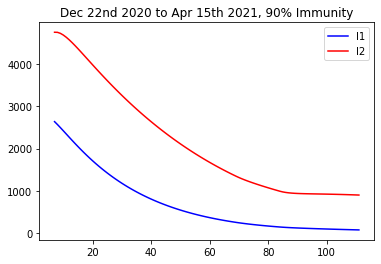

In [54]:
# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.16 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7, 'p': 0.9},
        ics={'i1': i1_1, 'l1': l1_1, 's': s_1, 'r': r_1, 'l2': l2_1, 'i2': i2_1, 'v':v_1},
        tdata=[7,69]) # 22 Dec 2020 to 5 Apr 2021

# computing points for plotting 
traj_2 = SEIR3.compute('test')
pts_2 = traj_2.sample()




# initial conditions on Mar 1st, sourced from model 

s_2 = pts_2['s'][-1]
l1_2 = pts_2['l1'][-1]
i1_2 = pts_2['i1'][-1]
l2_2 = pts_2['l2'][-1]
i2_2 = pts_2['i2'][-1]
r_2 = pts_2['r'][-1]
v_2 = pts_2['v'][-1]



# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.18 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7, 'p': 0.9},
        ics={'i1': i1_2, 'l1': l1_2, 's': s_2, 'r': r_2, 'l2': l2_2, 'i2': i2_2, 'v': v_2},
        tdata=[69,84]) 

# computing points for plotting 
traj_3 = SEIR3.compute('test')
pts_3 = traj_3.sample()


# initial conditions on Mar 1st, sourced from model 

s_3 = pts_3['s'][-1]
l1_3 = pts_3['l1'][-1]
i1_3 = pts_3['i1'][-1]
l2_3 = pts_3['l2'][-1]
i2_3 = pts_3['i2'][-1]
r_3 = pts_3['r'][-1]
v_3 = pts_3['v'][-1]



# vax rate assumed: 2% of N per week, immunity 90%
SEIR3.set(pars={'c': 0.25 , 'beta2': 0.4665 , 'delta1': 0/7, 'delta2': 0/7, 'N': 4900000, 'rho': 63000/7, 'p': 0.9},
        ics={'i1': i1_3, 'l1': l1_3, 's': s_3, 'r': r_3, 'l2': l2_3, 'i2': i2_3, 'v': v_3},
        tdata=[84,112]) 

# computing points for plotting 
traj_4 = SEIR3.compute('test')
pts_4 = traj_4.sample()


daily_cases_i1_90 = np.concatenate((pts_2['i1'][1:-1:100],pts_3['i1'][1:-1:100] ,pts_4['i1'][1:-1:100]))
daily_cases_i2_90 = np.concatenate((pts_2['i2'][1:-1:100],pts_3['i2'][1:-1:100] ,pts_4['i2'][1:-1:100]))
days_elapsed = np.concatenate((pts_2['t'][1:-1:100],pts_3['t'][1:-1:100] ,pts_4['t'][1:-1:100]))


plt.plot(days_elapsed, daily_cases_i1_90, label='I1', color='b')
plt.plot(days_elapsed, daily_cases_i2_90, label='I2', color='r')
plt.title('Dec 22nd 2020 to Apr 15th 2021, 90% Immunity')
plt.legend()
plt.show()

In [55]:
# getting variant 1 data
i1_wave1 = daily_cases
i1_wave2 = daily_cases2
i1_wave3 = pts_i1[1:-1:100]
i1_postdec = daily_cases_i1_90

# getting variant 2 data
i2_wave1and2 = np.zeros(278)
i2_wave3 = pts_i2[1:-1:100]
i2_postdec = daily_cases_i2_90

# concatenate into one array
i1_total = np.concatenate((i1_wave1, i1_wave2, i1_wave3, i1_postdec ))
i2_total = np.concatenate((i2_wave1and2, i2_wave3, i2_postdec ))

timedata = np.arange(0,409,1)


AttributeError: 'list' object has no attribute 'set_xticks'

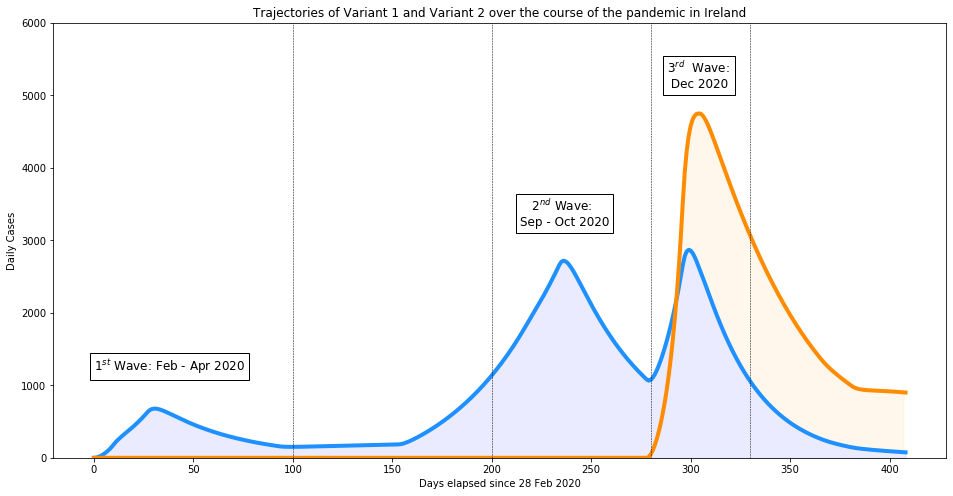

In [78]:
fig_final = plt.figure(figsize=(16,8))

plt.title('Trajectories of Variant 1 and Variant 2 over the course of the pandemic in Ireland')

plt.plot(timedata, i1_total, label='Variant 1', color='dodgerblue', linewidth=4)
plt.plot(timedata, i2_total, label='Variant 2', color='darkorange', linewidth=4)

# axis labels
plt.xlabel('Days elapsed since 28 Feb 2020')
plt.ylabel('Daily Cases')

plt.ylim(0,6000)

# text boxes
plt.text(0, 1200, r'$1^{st}$ Wave: Feb - Apr 2020', fontsize='large', bbox=dict(facecolor='none', edgecolor='k'))
plt.text(214, 3200, r'   $2^{nd}$ Wave:' + '\nSep - Oct 2020', fontsize='large', bbox=dict(facecolor='none', edgecolor='k'))
plt.text(288, 5100, r'$3^{rd}$ ' + ' Wave: \n Dec 2020', fontsize='large', bbox=dict(facecolor='none', edgecolor='k'))

# shading
x =  timedata
y1 = i1_total
y2 = i2_total
# Shade the area between y1 and line y=0
plt.fill_between(x, y1, 0,
                 facecolor="black", # The fill color
                 color='blue',       # The outline color
                 alpha=0.08)          # Transparency of the fill
# Shade the area between y2 and line y=0
plt.fill_between(x[293:-1], y2[293:-1], y1[293:-1],
                 facecolor="black", # The fill color
                 color='orange',       # The outline color
                 alpha=0.08) 

# x=293 is the cross point [293:-1]

# vertical lines
xcoords = [100, 200, 280, 330]
for xc in xcoords:
    plt.axvline(x=xc, color='k', linestyle='dashed', linewidth=0.5)

    
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336,366,396]
month_names = ['Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr'] 

fig_final.axes.set_xticks(month_starts)
fig_final.axes.set_xticklabels(month_names)
    
plt.legend()
plt.show()

fig_final.savefig('Summary Trajectory')

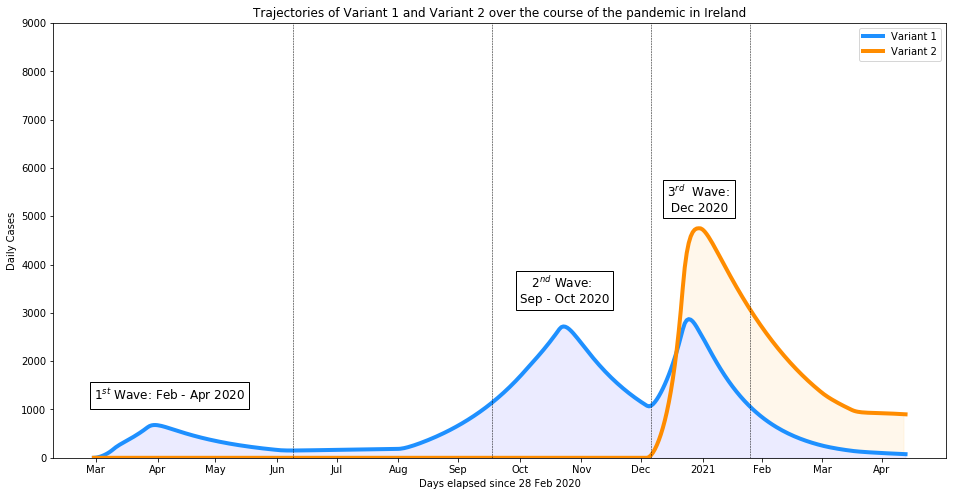

In [103]:
fig_final, ax = plt.subplots()

fig_final.set_figheight(8)
fig_final.set_figwidth(16)

plt.title('Trajectories of Variant 1 and Variant 2 over the course of the pandemic in Ireland')

ax.plot(timedata, i1_total, label='Variant 1', color='dodgerblue', linewidth=4)
ax.plot(timedata, i2_total, label='Variant 2', color='darkorange', linewidth=4)

# axis labels
ax.set_xlabel('Days elapsed since 28 Feb 2020')
ax.set_ylabel('Daily Cases')

ax.set_ylim([0,9000])

# text boxes
ax.text(0, 1200, r'$1^{st}$ Wave: Feb - Apr 2020', fontsize='large', bbox=dict(facecolor='none', edgecolor='k'))
ax.text(214, 3200, r'   $2^{nd}$ Wave:' + '\nSep - Oct 2020', fontsize='large', bbox=dict(facecolor='none', edgecolor='k'))
ax.text(288, 5100, r'$3^{rd}$ ' + ' Wave: \n Dec 2020', fontsize='large', bbox=dict(facecolor='none', edgecolor='k'))

# shading
x =  timedata
y1 = i1_total
y2 = i2_total
# Shade the area between y1 and line y=0
plt.fill_between(x, y1, 0,
                 facecolor="black", # The fill color
                 color='blue',       # The outline color
                 alpha=0.08)          # Transparency of the fill
# Shade the area between y2 and line y=0
plt.fill_between(x[293:-1], y2[293:-1], y1[293:-1],
                 facecolor="black", # The fill color
                 color='orange',       # The outline color
                 alpha=0.08) 

# x=293 is the cross point [293:-1]

# vertical lines
xcoords = [100, 200, 280, 330]
for xc in xcoords:
    ax.axvline(x=xc, color='k', linestyle='dashed', linewidth=0.5)

    
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336,366,396]
month_names = ['Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec','2021','Feb','Mar','Apr'] 

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
    
plt.legend()
plt.show()

fig_final.savefig('Summary Trajectory')

# Summary of total cases

In [57]:
I_total = i1_total + i2_total

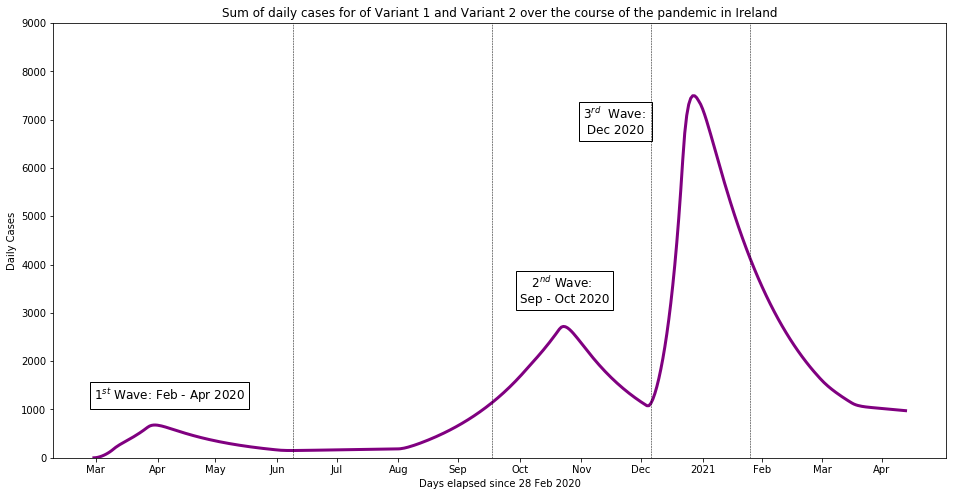

In [102]:
fig, ax =  plt.subplots()

plt.title('Sum of daily cases for of Variant 1 and Variant 2 over the course of the pandemic in Ireland')

fig.set_figheight(8)
fig.set_figwidth(16)

ax.plot(timedata, I_total, color='purple', linewidth=3)

ax.set_ylim([0,9000])

# axis labels
ax.set_xlabel('Days elapsed since 28 Feb 2020')
ax.set_ylabel('Daily Cases')

# text boxes
ax.text(0, 1200, r'$1^{st}$ Wave: Feb - Apr 2020', fontsize='large', bbox=dict(facecolor='none', edgecolor='k'))
ax.text(214, 3200, r'   $2^{nd}$ Wave:' + '\nSep - Oct 2020', fontsize='large', bbox=dict(facecolor='none', edgecolor='k'))
ax.text(246, 6700, r'$3^{rd}$ ' + ' Wave: \n Dec 2020', fontsize='large', bbox=dict(facecolor='none', edgecolor='k'))

# x=293 is the cross point [293:-1]

# vertical lines
xcoords = [100, 200, 280, 330]
for xc in xcoords:
    ax.axvline(x=xc, color='k', linestyle='dashed', linewidth=0.5)


month_starts = [1,32,61,92,122,153,183,214,245,275,306,336,366,396]
month_names = ['Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec','2021','Feb','Mar','Apr'] 

ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
plt.show()

fig.savefig('Summary Total Cases')